In [1]:
import pandas as pd

In [2]:
stk_data=pd.read_csv("Tatacoffee13_21.csv")

In [3]:
stk_data

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.90,1408.30,1415.10
1,2013-01-02,1421.00,1626.60,1416.15,1607.40
2,2013-01-03,1632.55,1673.90,1613.05,1626.20
3,2013-01-04,1627.75,1627.75,1574.60,1579.05
4,2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (2225, 4)


In [6]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])

In [7]:
data1

,Open,High,Low,Close
0,0.849900,0.845408,0.856100,0.854203
1,0.856394,0.967399,0.861040,0.974481
2,0.988480,0.996439,0.984959,0.986240
3,0.985483,0.968105,0.960760,0.956749
4,0.955669,0.975319,0.955033,0.967132
...,...,...,...,...
2220,0.095842,0.096329,0.096510,0.097323
2221,0.097777,0.095745,0.096951,0.096041
2222,0.096466,0.093934,0.095252,0.094821
2223,0.094031,0.105047,0.093143,0.105673


In [8]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1780
X_train length: (1780, 4)
X_test length: (445, 4)
y_train length: (1780, 4)
y_test length: (445, 4)


In [12]:
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}

In [15]:
# Fit the VAR model
model = VAR(X_train)
optimal_order = 5  # You can choose the optimal order based on criteria like AIC or BIC
var_model = model.fit(optimal_order)


In [16]:
# Forecast the next five days
forecast = var_model.forecast(y_train.values[-optimal_order:], steps=5)
forecast_df = pd.DataFrame(forecast, columns=["Open", "High", "Low", "Close"])


In [17]:
# Inverse transform the forecast to the original scale
forecast_original_scale = Ms.inverse_transform(forecast_df)
forecast_original_scale = pd.DataFrame(forecast_original_scale, columns=["Open", "High", "Low", "Close"])
print("Next five days forecast:")
print(forecast_original_scale)


Next five days forecast:
        Open       High        Low      Close
0  68.843706  71.055211  65.745397  67.825615
1  68.880734  71.024616  66.774374  69.431082
2  70.527433  71.678239  67.903954  69.185686
3  69.639665  71.353153  68.247468  69.642640
4  69.813511  71.115486  67.621614  69.219885


In [18]:
# Evaluate the model
pred = var_model.forecast(X_test.values, steps=len(X_test))
pred_df = pd.DataFrame(pred, columns=["Open", "High", "Low", "Close"])


In [19]:
for col in data1.columns:
    mse = mean_squared_error(X_test[col], pred_df[col])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((X_test[col] - pred_df[col]) / X_test[col])) * 100
    print(f'{col}:')
    print(f'  Mean Squared Error (MSE): {mse}')
    print(f'  Root Mean Squared Error (RMSE): {rmse}')
    print(f'  Mean Absolute Percentage Error (MAPE): {mape}%')


Open:
  Mean Squared Error (MSE): 0.0023895808525276913
  Root Mean Squared Error (RMSE): 0.04888333921212514
  Mean Absolute Percentage Error (MAPE): nan%
High:
  Mean Squared Error (MSE): 0.0023771330738652434
  Root Mean Squared Error (RMSE): 0.04875585168844088
  Mean Absolute Percentage Error (MAPE): nan%
Low:
  Mean Squared Error (MSE): 0.002360279999983232
  Root Mean Squared Error (RMSE): 0.04858271297471182
  Mean Absolute Percentage Error (MAPE): nan%
Close:
  Mean Squared Error (MSE): 0.0023842241328892173
  Root Mean Squared Error (RMSE): 0.04882851761920709
  Mean Absolute Percentage Error (MAPE): nan%


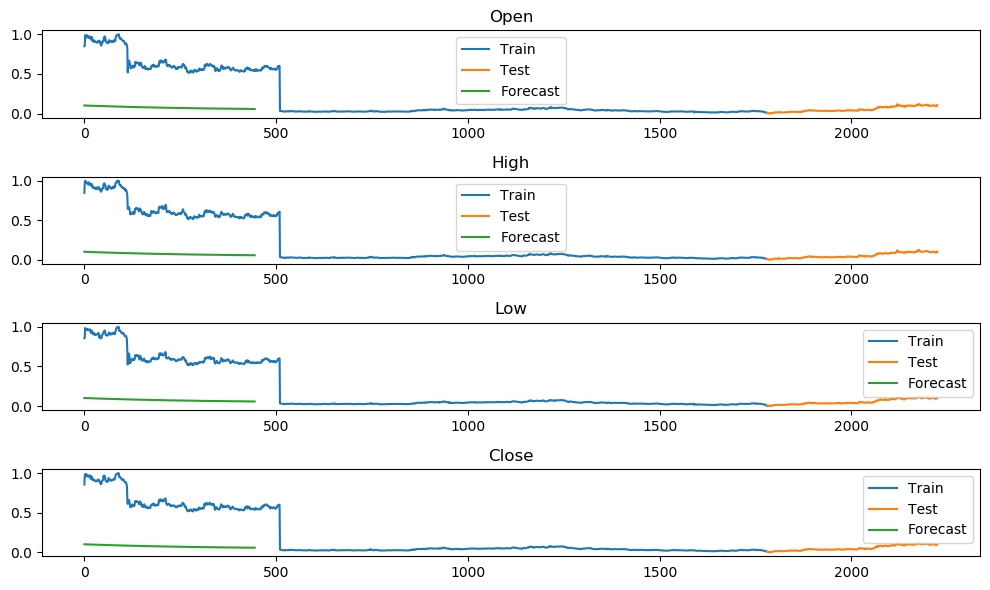

In [20]:
# Plot the results
plt.figure(figsize=(10, 6))

for i, col in enumerate(data1.columns):
    plt.subplot(len(data1.columns), 1, i+1)
    plt.plot(X_train.index, X_train[col], label='Train')
    plt.plot(X_test.index, X_test[col], label='Test')
    plt.plot(pred_df.index, pred_df[col], label='Forecast')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()
